In [57]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
from matplotlib.colors import LogNorm
%matplotlib inline

In [58]:
# load saved data (mtt, m1, WC) values from files

cG = np.loadtxt("cG.txt", dtype=float)
cuG_33 = np.loadtxt("cuG_33.txt", dtype=float)
cqd1_3311 = np.loadtxt("cqd1_3311.txt", dtype=float)
cqq1_3333 = np.loadtxt("cqq1_3333.txt", dtype=float)
cqu1_1133 = np.loadtxt("cqu1_1133.txt", dtype=float)
cqu8_1133 = np.loadtxt("cqu8_1133.txt", dtype=float)
cqu8_3311 = np.loadtxt("cqu8_3311.txt", dtype=float)
cuu_3333 = np.loadtxt("cuu_3333.txt", dtype=float)

In [59]:
# x and y axes (common to all)

mtt = np.unique(cG[:,0])
m1 = np.unique(cG[:,1])

In [105]:
# General plot attributes

plt.rcParams['axes.labelpad'] = 16
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300})

In [106]:
# function for making 2d plots

def plot_fn_2d(wc_arr, wc_name, filename):
    vals = wc_arr.reshape(len(mtt),len(m1))
    fig, ax = plt.subplots(figsize=(8, 6))
    img = ax.imshow(vals.T, cmap='RdYlBu', norm=LogNorm(),
                    origin='lower', extent=[mtt.min(), mtt.max(), m1.min(), m1.max()])

    ax.plot([mtt.min(), mtt.max()], [m1.min(), m1.max()], color='gray', linestyle='--', linewidth=1.5)
    x_fill = np.linspace(mtt.min(), mtt.max(), 100)
    ax.fill_between(x_fill, x_fill, m1.max(), color='gray', alpha=0.4)

    # Colorbar and labels
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label(wc_name, fontsize=27)
    ax.set_xlabel(r'$m_{\tilde{t}_R}\,\, {\rm (TeV)}$', fontsize=27)
    ax.set_ylabel(r'$m_1\,\, {\rm (TeV)}$', fontsize=27)
    ax.set_title(r'$g_{1} = 0.37, \quad g_{s} = 1.1$', fontsize=27, pad=16)
    ax.set_xticks([0.5,1.0,1.5,2.0])
    ax.set_yticks([0.5,1.0,1.5,2.0])
    plt.tight_layout()
    #plt.show()
    plt.savefig(filename)

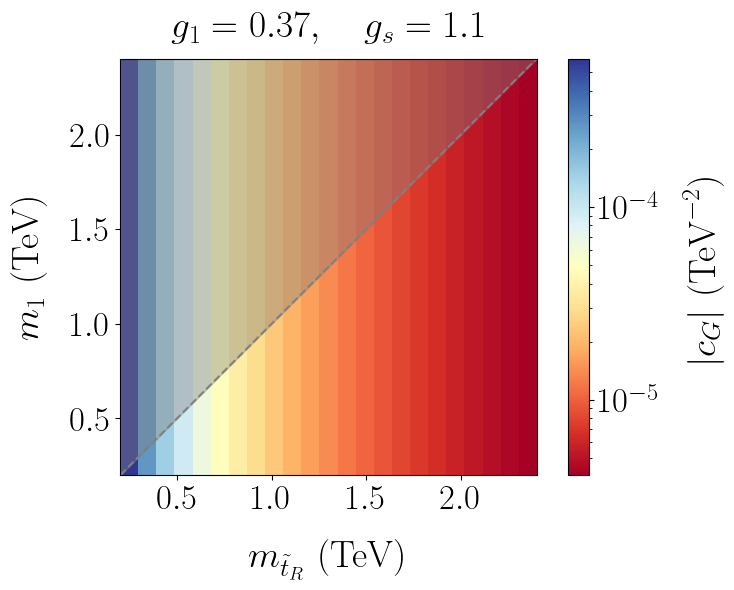

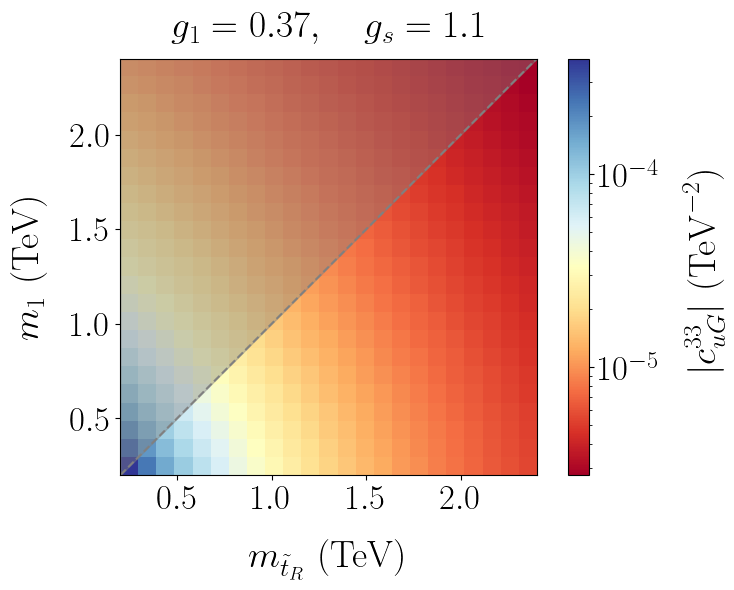

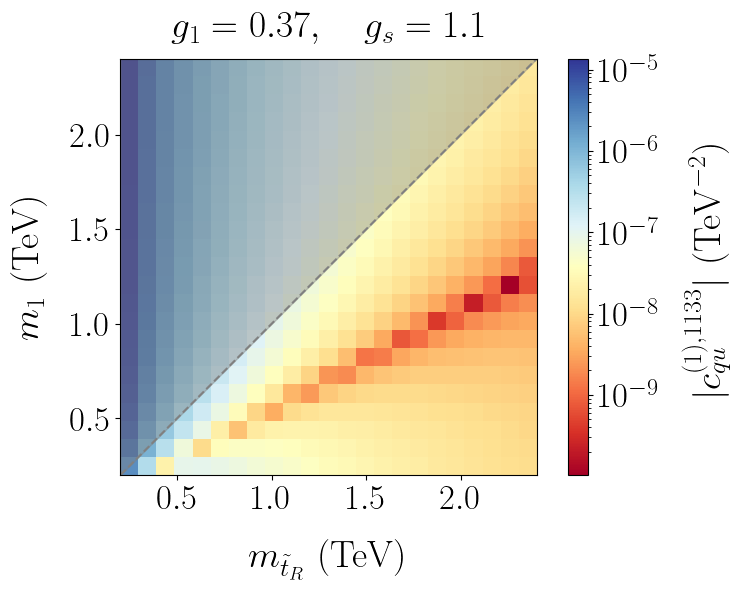

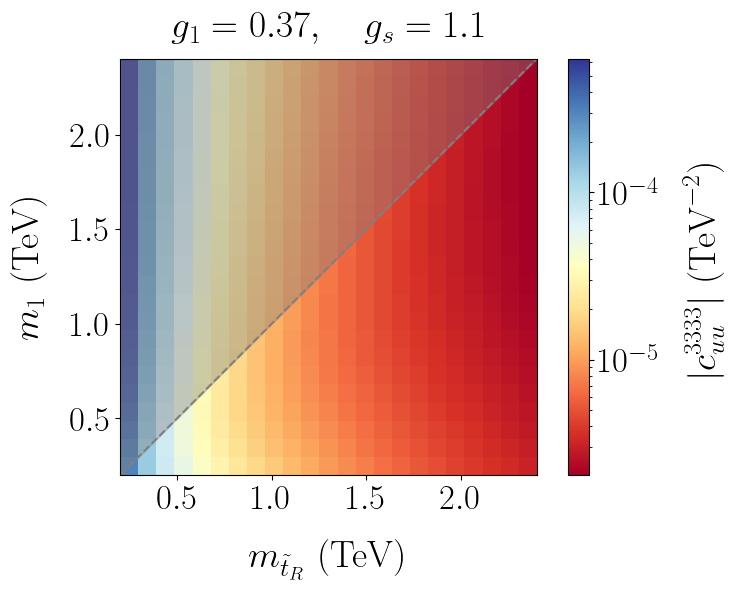

In [107]:
plot_fn_2d(cG[:,2], r'$|c_{G}|\,\, ({\rm TeV}^{-2})$', "cG.pdf")
plot_fn_2d(abs(cuG_33[:,2]), r'$|c_{uG}^{33}|\,\, ({\rm TeV}^{-2})$', "cuG_33.pdf")
plot_fn_2d(abs(cqu1_1133[:,2]), r'$|c_{qu}^{(1),1133}|\,\, ({\rm TeV}^{-2})$', "cqu1_1133.pdf")
plot_fn_2d(abs(cuu_3333[:,2]), r'$|c_{uu}^{3333}|\,\, ({\rm TeV}^{-2})$', "cuu_3333.pdf")

In [63]:
# load data from yaml file into a dictionary
with open('barplot-data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Extract keys and values
keys = list(data.keys())
values = list(data.values())

In [64]:
for i in range(len(data)):
    print(f"{keys[i]}: {values[i]}")

cG: 1.0405748140851329e-05
cuG_33: -9.285729806397598e-06
cqu1_1133: -1.333090808305593e-08
cuu_3333: -5.279000846324838e-06
cqq1_3333: -2.8941411295712483e-06
cqd1_3311: 1.30241571066879e-07
cqu8_3311: -6.867793770625233e-05
cqu8_1133: -4.901769057176409e-05


In [65]:
values = abs(np.array(values))
values

array([1.04057481e-05, 9.28572981e-06, 1.33309081e-08, 5.27900085e-06,
       2.89414113e-06, 1.30241571e-07, 6.86779377e-05, 4.90176906e-05])

In [100]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=values.min(), vmax=values.max())
cmap = cm.RdYlBu
colors = cmap(norm(values))

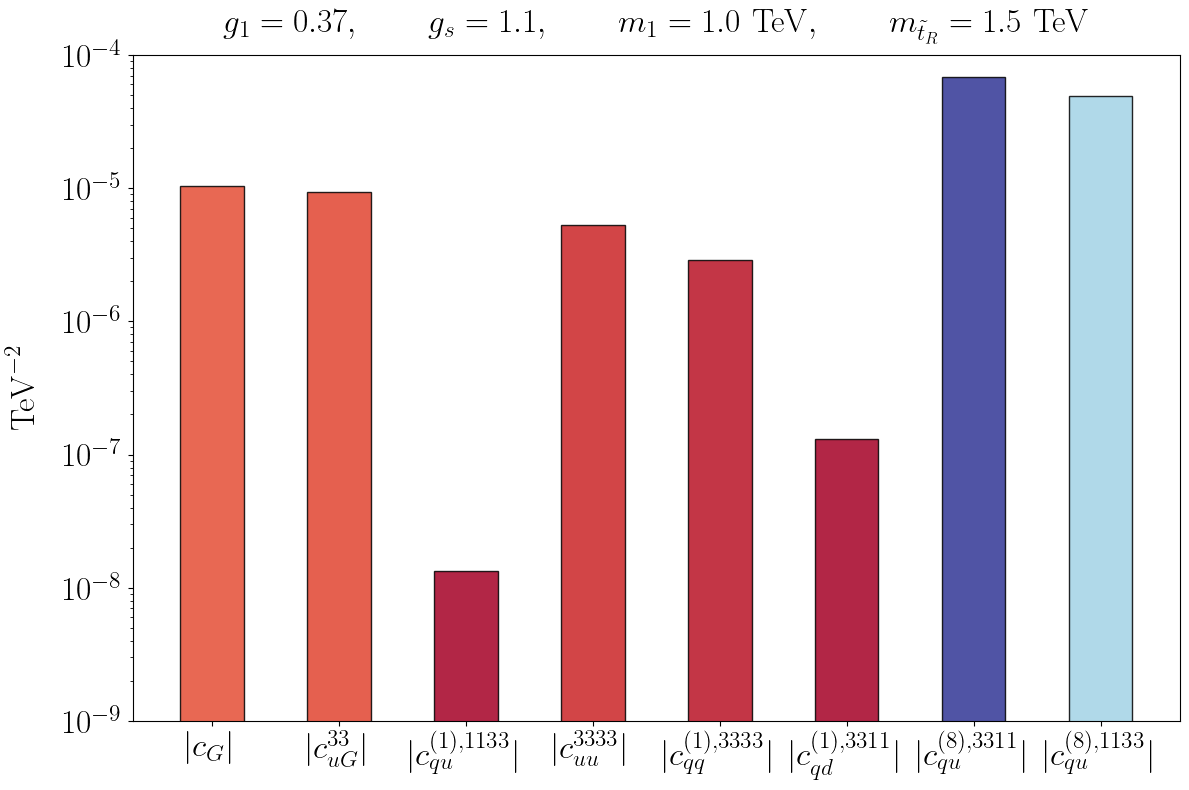

In [104]:
# Create a barplot for order of magnitude comparisons

plt.rcParams['axes.labelpad'] = 16
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24

bar_width = 0.5

fig, ax = plt.subplots(figsize=(12, 8))
x_positions = range(len(keys))
ax.bar(x_positions, values, width=bar_width, color=colors, edgecolor='black', alpha=0.85)

ax.set_yscale('log')
ax.set_ylim(1e-9,1e-4)

# Customize plot
ax.set_xticks(x_positions)
ax.set_xticklabels([r'$|c_{G}|$', 
                    r'$|c_{uG}^{33}|$', 
                    r'$|c_{qu}^{(1),1133}|$', 
                    r'$|c_{uu}^{3333}|$', 
                    r'$|c_{qq}^{(1),3333}|$', 
                    r'$|c_{qd}^{(1),3311}|$', 
                    r'$|c_{qu}^{(8),3311}|$', 
                    r'$|c_{qu}^{(8),1133}|$' ])  # Set the keys as x-tick labels
#ax.set_xlabel('Keys')
ax.set_ylabel(r'${\rm TeV}^{-2}$', fontsize=24)
ax.set_title(r'$g_{1} = 0.37, \quad\quad g_{s} = 1.1, \quad\quad m_{1} = 1.0\,\, {\rm TeV}, \quad\quad m_{\tilde{t}_R} = 1.5 \,\, {\rm TeV}$', fontsize=24, pad=16)

# Show plot
plt.tight_layout()
plt.savefig("barplot.pdf")